In [3]:
import numpy as np
import utils
import qiskit
import matplotlib.pyplot as plt
import pandas as pd
%load_ext autoreload
%autoreload 2

In [4]:
provider = qiskit.IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-03-15 00:14:45,613: Credentials are already in use. The existing account in the session will be replaced.


## 5 qubits linear

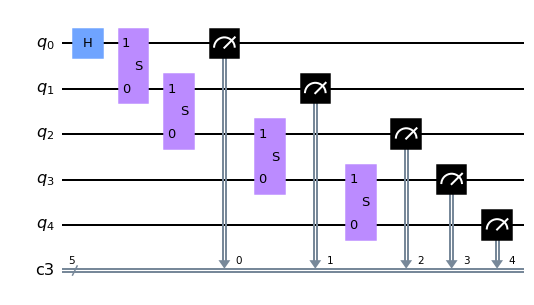

In [30]:
linear_interactions = {(i, i + 1): 1 for i in range(4)}
linear_circ = utils.linear_circuit(5, linear_interactions)
linear_circ.add_register(qiskit.ClassicalRegister(5))
linear_circ.measure(range(5), range(5))
linear_circ.draw('mpl')

### 8192 shots on lima and santiago qibm with 5 qubits

In [31]:
lima_result = utils.result_from_csv('measured_data/linear5_lima.csv')
santiago_result = utils.result_from_csv('measured_data/linear5_santiago.csv')

In [33]:
backend_sim = provider.get_backend('ibmq_qasm_simulator')
job_sim = qiskit.execute(linear_circ, backend_sim, shots=8192)
sim_result = job_sim.result().get_counts()

In [34]:
true_pd = utils.get_probs_distribution(5, linear_interactions)
true_result = {row['s']: row['Pr[s]'] for (ind, row) in true_pd.iterrows()}

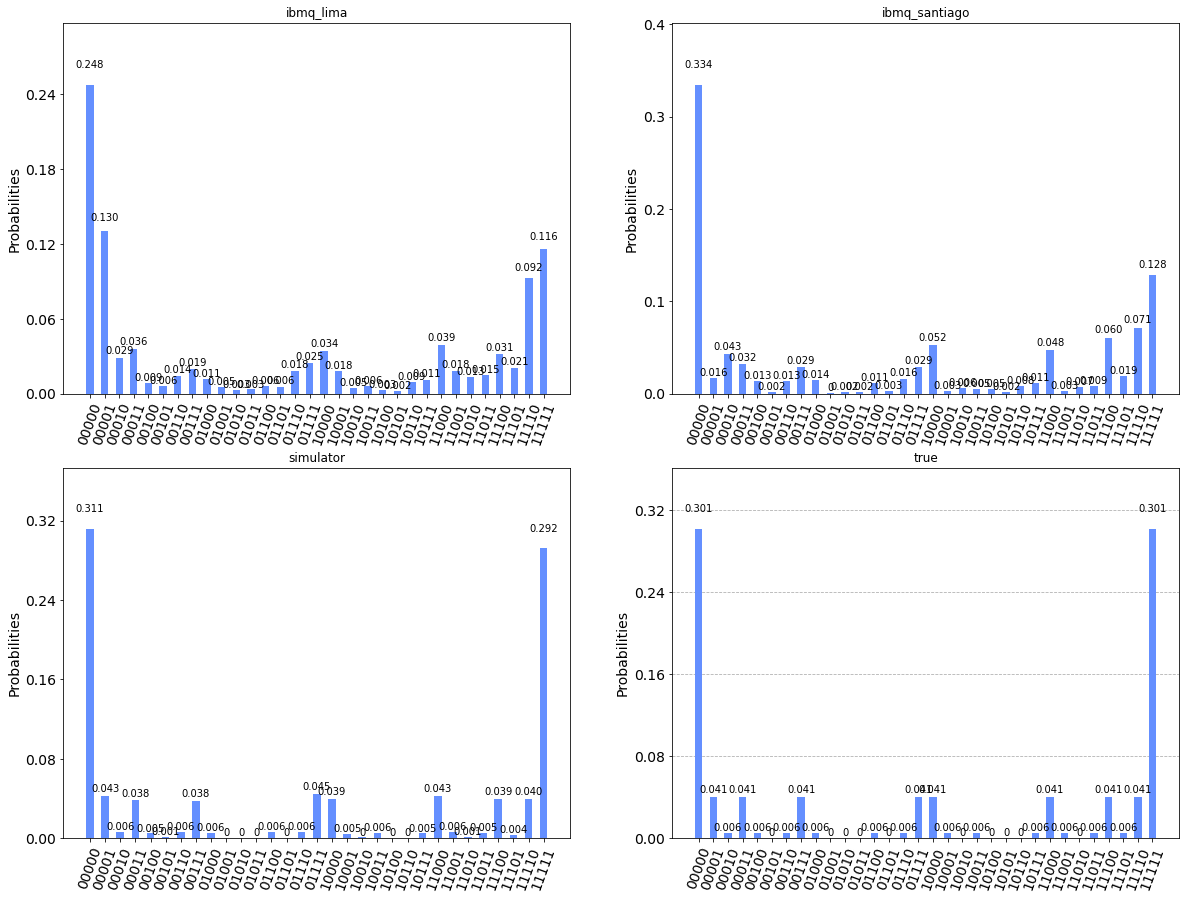

In [7]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.set_title('ibmq_lima')
ax2.set_title('ibmq_santiago')
ax3.set_title('simulator')
ax4.set_title('true')
fig.set_size_inches(20, 15)

qiskit.visualization.plot_histogram(lima_result, ax=ax1)
qiskit.visualization.plot_histogram(santiago_result, ax=ax2)
qiskit.visualization.plot_histogram(sim_result, ax=ax3)
qiskit.visualization.plot_histogram(true_result, ax=ax4)

In [35]:
utils.distribution_chi2_pvalue(sim_result, linear_interactions)

Power_divergenceResult(statistic=20.606279657432804, pvalue=0.8997943407314726)

In [41]:
utils.distribution_chi2_pvalue(lima_result, linear_interactions)

Power_divergenceResult(statistic=121.9623880714979, pvalue=9.814593059289828e-13)

In [42]:
utils.distribution_chi2_pvalue(santiago_result, linear_interactions)

Power_divergenceResult(statistic=79.0911159798957, pvalue=4.447576180929295e-06)

## 15 qubits linear

In [21]:
linear_interactions15 = {(i, i + 1): 1 for i in range(14)}
linear_circ15 = utils.linear_circuit(15, linear_interactions15)
linear_circ15.add_register(qiskit.ClassicalRegister(15))
linear_circ15.measure(range(15), range(15))

In [39]:
melbourne_result = utils.result_from_csv('measured_data/linear15_melbourne.csv')

In [40]:
utils.distribution_chi2_pvalue(melbourne_result, linear_interactions15)

Power_divergenceResult(statistic=24225174.19880987, pvalue=0.0)

## 5 qubits circled

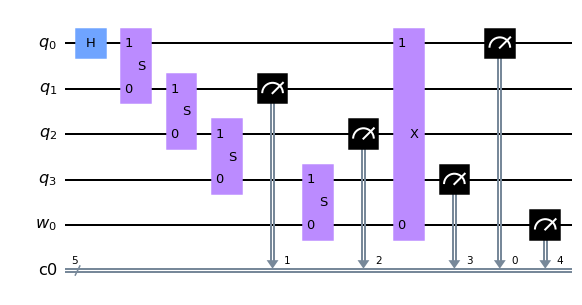

In [5]:
spins_n = 4
circled_interactions = {(i, (i + 1) % spins_n): 1 for i in range(spins_n)}
circled_circ = utils.circled_circuit(spins_n, circled_interactions)
circled_circ.add_register(qiskit.ClassicalRegister(spins_n + 1))
circled_circ.measure(range(spins_n + 1), range(spins_n + 1))
circled_circ.draw('mpl')

In [6]:
lima_result = utils.result_from_csv('measured_data/circled4_lima.csv')
lima_result = utils.process_circled_result(lima_result)
santiago_result = utils.result_from_csv('measured_data/circled4_santiago.csv')
santiago_result = utils.process_circled_result(santiago_result) 

In [7]:
backend_sim = provider.get_backend('ibmq_qasm_simulator')
job_sim = qiskit.execute(circled_circ, backend_sim, shots=8192)
sim_result = job_sim.result().get_counts()

In [8]:
sim_result = utils.process_circled_result(sim_result)

In [7]:
true_pd = utils.get_probs_distribution(4, circled_interactions)
true_result = {row['s']: row['Pr[s]'] for (ind, row) in true_pd.iterrows()}

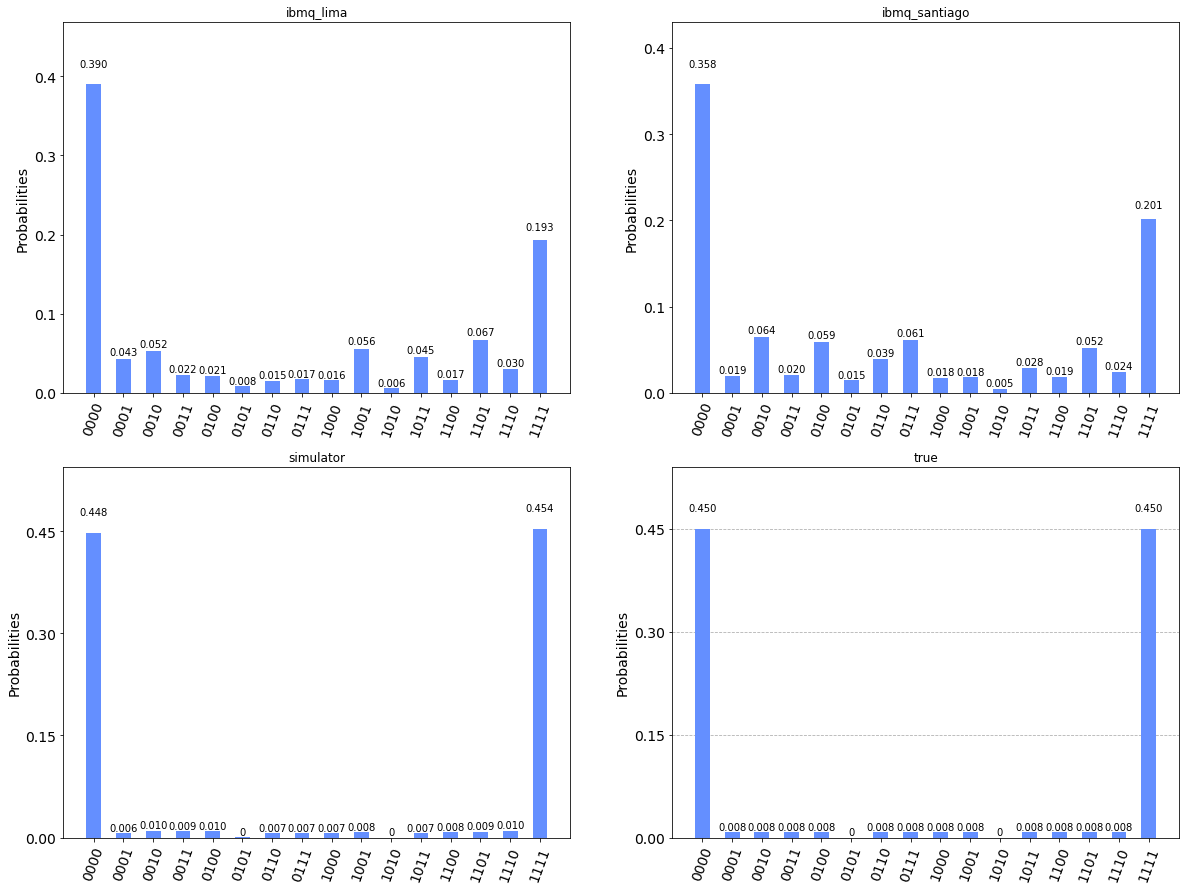

In [8]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.set_title('ibmq_lima')
ax2.set_title('ibmq_santiago')
ax3.set_title('simulator')
ax4.set_title('true')
fig.set_size_inches(20, 15)

qiskit.visualization.plot_histogram(lima_result, ax=ax1)
qiskit.visualization.plot_histogram(santiago_result, ax=ax2)
qiskit.visualization.plot_histogram(sim_result, ax=ax3)
qiskit.visualization.plot_histogram(true_result, ax=ax4)

In [10]:
utils.distribution_chi2_pvalue(sim_result, circled_interactions)

Power_divergenceResult(statistic=15.164628794558634, pvalue=0.43962499823310724)

In [13]:
utils.distribution_chi2_pvalue(lima_result, circled_interactions)

Power_divergenceResult(statistic=9591.541565805985, pvalue=0.0)

In [14]:
utils.distribution_chi2_pvalue(santiago_result, circled_interactions)

Power_divergenceResult(statistic=14563.787262203876, pvalue=0.0)

## 14 qubits circled

In [15]:
spins_n = 14
circled_interactions14 = {(i, (i + 1) % spins_n): 1 for i in range(spins_n)}
circled_circ14 = utils.circled_circuit(spins_n, circled_interactions14)
circled_circ14.add_register(qiskit.ClassicalRegister(spins_n + 1))
circled_circ14.measure(range(spins_n + 1), range(spins_n + 1))

In [16]:
melbourne_circled14_result = utils.result_from_csv('measured_data/circled14_melbourne.csv')
melbourne_circled14_result = utils.process_circled_result(melbourne_circled14_result)

In [17]:
shots_n = 8192
melbourne_circled14_result = {key: round(value * shots_n) for key, value in melbourne_circled14_result.items()}

In [18]:
utils.distribution_chi2_pvalue(melbourne_circled14_result, circled_interactions14)

Power_divergenceResult(statistic=4658022565475.16, pvalue=0.0)

Например, теоретическое значение очень сильно расходится с практическим для наблюдения '00000000000000'.

In [40]:
equal_oriented_enrgy = utils.spins_energy(utils.spins_from_string01('0'*14), circled_interactions14)
equal_oriented_enrgy

1202604.2841647768

In [58]:
all_except_one_energy = utils.spins_energy(utils.spins_from_string01('0'*12 + '1' + '0'), circled_interactions14)
all_except_one_energy

22026.465794806718

In [59]:
equal_oriented_enrgy / all_except_one_energy

54.598150033144236

Однако на практике

In [60]:
melbourne_circled14_result['0'*14], melbourne_circled14_result['0' * 12 + '1' + '0']

(4, 8)

## D-Wave adiabatic computer

In [44]:
import dimod
from dwave.system import DWaveSampler
from dwave.system import EmbeddingComposite

In [45]:
n = 15
bqm = dimod.BinaryQuadraticModel({i: 0 for i in range(n)},
                                 {(i, i + 1): -1 for i in range(n - 1)},
                                  0,
                                  dimod.Vartype.SPIN)

In [48]:
sampler = DWaveSampler() 
embedding_sampler = EmbeddingComposite(sampler)
sampleset = embedding_sampler.sample(bqm, num_reads=8192)

In [60]:
d_wave_linear_result = {}
for (obs, _, oc, _) in sampleset.record:
    d_wave_linear_result[utils.string01_from_spins(obs)] = oc

In [59]:
utils.distribution_chi2_pvalue(d_wave_linear_result, linear_interactions15)

Power_divergenceResult(statistic=16048.132115294076, pvalue=0.0)

Стоит отметить существенно меньшее разнообразие наблюдений адиабатического компьютера

In [68]:
print(f'Количество различных наблюдений\nIBM: {len(melbourne_result.keys())}\nD-Wave: {len(d_wave_linear_result.keys())}')

Количество различных наблюдений
IBM: 6684
D-Wave: 52
